***TASK #3B***

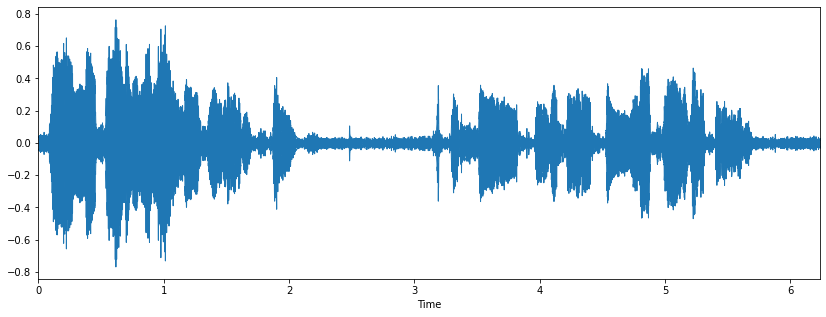

In [2]:
import librosa
audio_path = 'assets/Ex3_sound4.wav'
audio , sr = librosa.load(audio_path, 44000)

#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio, sr=sr)


#SPECTROGRAM

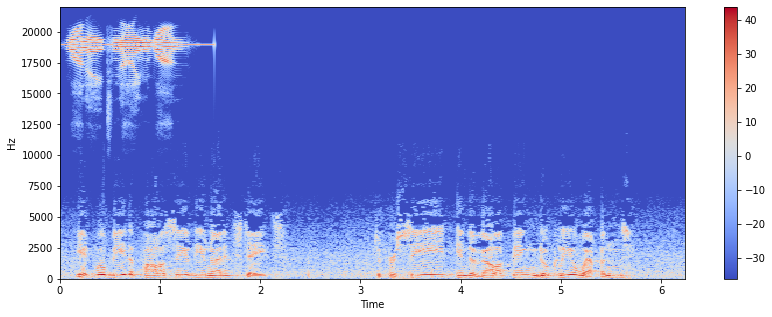

In [3]:
#display Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

AS WE CAN SEE FROM SPECTROGRAM ABOVE, IT'S Ex3_sound4.wav THAT CONTAINS HIDDEN MESSAGE

#FURTHER PROCCESSING TO EXTRACT MESSAGE

HIGH PASS FILTERING TO LOOOSE ALL THE DATA EXCEPT HIDDEN

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


audio = butter_highpass_filter(audio, 15000, 44000)

VISUALIZING RESULTS

/usr/local/lib/python3.8/dist-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


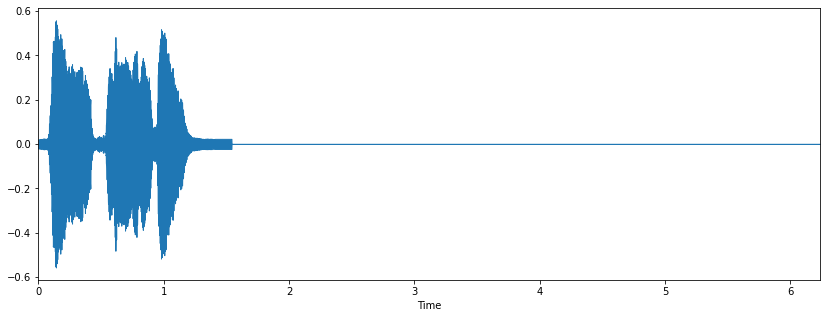

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio, sr=sr)

FREQUENCY MODULATION TO BRING ULTRASONIC SIGNAL TO AUDIBLE RANGE

In [6]:
from math import pi

fs = 90000
t = np.arange(0,6, 1/fs)
fc = 1
b = 15
audio = np.pad(audio, (0,t.shape[0]-audio.shape[0]))
fm = np.cos(2*pi*fc*t + b*audio)

LOW PASS FILTERING TO LOOSE NOISE

In [19]:
from scipy.signal import butter,filtfilt


T = 5.0         
fs = 22000      
cutoff = 7000         
nyq = 0.5 * fs  
order = 2       
n = int(T * fs) 
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / (0.5 * fs)
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [20]:
import IPython

fm = butter_lowpass_filter(fm, cutoff, fs, order)
IPython.display.Audio(fm, rate=30000)


THE SECRET MESSAGE SAYS 9891